In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Tic-Tac-Toe Environment for Q-Learning Agent

The goal is to implement a 3×3 Tic-Tac-Toe game environment for a Q-learning agent. This environment supports a two-player game, where the opponent is part of the environment.

## Environment Methods

### 1. Initialization (`__init__`)
- Starts with an empty board position.
- Assigns player symbols: 
  - Agent: `'X'`
  - Opponent: `'O'`
- Determines who starts the game.
  - Assume the agent always plays as `'X'`.

---

### 2. Action (`act`)
- Takes as input a move suggested by the agent.
- Verifies the validity of the move:
  - Ensures the chosen position is within the board.
  - Ensures the chosen position is not already occupied.
- Places the `'X'` in the appropriate board position if valid.

---

### 3. Print Board (`print`)
- Prints the current state of the board.

---

### Additional Methods (Optional)
- Additional helper methods can be implemented as needed, such as:
  - Checking if the game is over (win, draw, or loss).
  - Determining valid moves.
  - Handling the opponent's move.
  - Resetting the board.


# Envionment Setup

In [11]:
import random

class TicTacToe:
    def __intit__(self):
        self.board = np.full((3,3), ' ') 
        self.cur_player = 'X'
        self.opponent = 'O'

    def reset(self):
        self.board = np.full((3,3), ' ')
        self.cur_player = 'X'
        return self.board

    def is_valid_move(self, row, col):
        return 0 <= row < 3 and 0<= col < 3 and self.board[row, col] == ' '

    def act(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.cur_player
            return self.check_winner()
        else:
            return "Invalid"

    def print_board(self):
        for row in self.board:
            print('|' .join (row))
            print('-'*5)

    def check_winner(self):
        for i in range(3):
            if self.board[0][i] == self.board[1][i] == self.board[2][i] != ' ':
                return self.cur_player
            if self.board[i][0] == self.board[i][1] == self.board[i][2] != ' ':
                return self.cur_player

        if self.board[0][0] == self.board[1][1] == self.board[2][2] != ' ':
            return self.cur_player
        if self.board[0][2 - 0] == self.board[1][2- 1] == self.board[2][2 - 2] != ' ':
            return self.cur_player
        if all(self.board[i][j] != ' ' for i in range(3) for j in range(3)):
            return "Draw"
            
        return None

    def switch_player(self):
        self.cur_player = 'X' if self.cur_player == 'O' else 'O'
        

# Opponents for Q-Learning Agent in Tic-Tac-Toe

To train the Q-learning agent effectively, two types of opponents are implemented: a **random agent** and a **safe agent**.

## 1. Random Agent
- **Behavior**: 
  - Selects a square uniformly at random from all available empty squares on the board.
- **Methodology**:
  - Identify all empty squares.
  - Pick one randomly using a uniform probability distribution.

---

## 2. Safe Agent
- **Behavior**:
  - Prioritizes moves based on a heuristic strategy:
    1. **Winning Move**: If there is a move that allows the safe agent to win, it selects that square.
    2. **Blocking Move**: If no winning move exists but the opponent has a winning move on their next turn, the safe agent selects the square to block the opponent.
    3. **Fallback**: If no winning or blocking moves exist, the safe agent defaults to the behavior of the random agent.
- **Methodology**:
  1. Check all available moves:
     - Simulate each move for the safe agent and determine if it results in a win.
  2. If no winning move is found:
     - Simulate each move for the opponent and check if it would result in a win for them. Choose that square to block.
  3. If neither condition is met:
     - Default to selecting a random square from the available moves.

---

### Additional Notes
- Both agents must adhere to the rules of the game.
- The safe agent requires functionality to simulate future moves and evaluate board states.
- Random selection should ensure all available moves have an equal probability.


In [12]:
import random
class RandomAgent:
    def select_move(self, board):
        empty_spaces = [(i,j) for i in range(3) for j in range (3) if board[i][j] == ' ']
        return random.choice(empty_spaces)

class SafeAgent:
    def select_move(self, board):       
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    if self.check_winner(board, 'O'):
                        board[i][j] = ' '  
                        return (i, j)
                    board[i][j] = ' ' 

        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    if self.check_winner(board, 'X'):
                        board[i][j] = ' ' 
                        return (i, j)
                    board[i][j] = ' '  

        random_agent = RandomAgent()
        return random_agent.select_move(board)

    def check_winner(self, board, player):
        for i in range(3):
            if board[i][0] == board[i][1] == board[i][2] == player:
                return True
            if board[0][i] == board[1][i] == board[2][i] == player:
                return True
        if board[0][0] == board[1][1] == board[2][2] == player:
            return True
        if board[0][2] == board[1][1] == board[2][0] == player:
            return True
        return False


## Training with Safe and Random Agents

In [13]:
game = TicTacToe()
random_agent = RandomAgent()
safe_agent = SafeAgent()

game.reset()
game.print_board()

while True:
    if game.cur_player== 'X':
        move = random_agent.select_move(game.board)  
        print(f"Agent chooses: {move}")
    else:
        move = safe_agent.select_move(game.board)
        print(f"Opponent chooses: {move}")

    result = game.act(move[0], move[1])
    game.print_board()

    if result:
        print(f"Game Over: {result}")
        break

    game.switch_player()

 | | 
-----
 | | 
-----
 | | 
-----
Agent chooses: (2, 0)
 | | 
-----
 | | 
-----
X| | 
-----
Opponent chooses: (0, 2)
 | |O
-----
 | | 
-----
X| | 
-----
Agent chooses: (1, 2)
 | |O
-----
 | |X
-----
X| | 
-----
Opponent chooses: (2, 2)
 | |O
-----
 | |X
-----
X| |O
-----
Agent chooses: (0, 1)
 |X|O
-----
 | |X
-----
X| |O
-----
Opponent chooses: (1, 1)
 |X|O
-----
 |O|X
-----
X| |O
-----
Agent chooses: (0, 0)
X|X|O
-----
 |O|X
-----
X| |O
-----
Opponent chooses: (1, 0)
X|X|O
-----
O|O|X
-----
X| |O
-----
Agent chooses: (2, 1)
X|X|O
-----
O|O|X
-----
X|X|O
-----
Game Over: Draw


random vs random

In [14]:
game.reset()
game.print_board()

while True:
    if game.cur_player== 'X':
        move = random_agent.select_move(game.board)  
        print(f"Agent chooses: {move}")
    else:
        move = random_agent.select_move(game.board)
        print(f"Opponent chooses: {move}")

    result = game.act(move[0], move[1])
    game.print_board()

    if result:
        print(f"Game Over: {result}")
        break

    game.switch_player()

 | | 
-----
 | | 
-----
 | | 
-----
Agent chooses: (0, 2)
 | |X
-----
 | | 
-----
 | | 
-----
Opponent chooses: (2, 2)
 | |X
-----
 | | 
-----
 | |O
-----
Agent chooses: (1, 1)
 | |X
-----
 |X| 
-----
 | |O
-----
Opponent chooses: (2, 1)
 | |X
-----
 |X| 
-----
 |O|O
-----
Agent chooses: (0, 1)
 |X|X
-----
 |X| 
-----
 |O|O
-----
Opponent chooses: (1, 2)
 |X|X
-----
 |X|O
-----
 |O|O
-----
Agent chooses: (1, 0)
 |X|X
-----
X|X|O
-----
 |O|O
-----
Opponent chooses: (0, 0)
O|X|X
-----
X|X|O
-----
 |O|O
-----
Agent chooses: (2, 0)
O|X|X
-----
X|X|O
-----
X|O|O
-----
Game Over: X


safe vs safe

In [15]:
game.reset()
game.print_board()

while True:
    if game.cur_player== 'X':
        move = safe_agent.select_move(game.board)  
        print(f"Agent chooses: {move}")
    else:
        move = safe_agent.select_move(game.board)
        print(f"Opponent chooses: {move}")

    result = game.act(move[0], move[1])
    game.print_board()

    if result:
        print(f"Game Over: {result}")
        break

    game.switch_player()

 | | 
-----
 | | 
-----
 | | 
-----
Agent chooses: (1, 1)
 | | 
-----
 |X| 
-----
 | | 
-----
Opponent chooses: (2, 2)
 | | 
-----
 |X| 
-----
 | |O
-----
Agent chooses: (2, 1)
 | | 
-----
 |X| 
-----
 |X|O
-----
Opponent chooses: (0, 1)
 |O| 
-----
 |X| 
-----
 |X|O
-----
Agent chooses: (2, 0)
 |O| 
-----
 |X| 
-----
X|X|O
-----
Opponent chooses: (0, 2)
 |O|O
-----
 |X| 
-----
X|X|O
-----
Agent chooses: (0, 0)
X|O|O
-----
 |X| 
-----
X|X|O
-----
Opponent chooses: (1, 2)
X|O|O
-----
 |X|O
-----
X|X|O
-----
Game Over: O


# Q-Learning Agent Training and Evaluation in Tic-Tac-Toe

The Q-learning agent learns to play Tic-Tac-Toe by playing 10,000 training games against different opponents and evaluating its progress. After training, the agent is tested for performance against both random and safe opponents.

---

## Training and Evaluation Process

### Training
- **Objective**: Train the agent using tabular Q-learning by playing 10,000 games.
- **Opponent Selection**: During training, the opponent can be:
  1. Only a **random agent**.
  2. Only a **safe agent**.
  3. A randomly selected agent (either random or safe).
- **Game Rules**:
  - A fair coin toss determines which player makes the first move in each game.
- **Progress Evaluation**:
  - After every 200 training games:
    - Play 100 evaluation games against the training opponent.
    - Use the **greedy policy** (based on the current Q-table).
    - Record the number of wins out of these 100 games.
    - Plot the progress of training as a function of the number of training epochs.

---

### Testing
- **Objective**: Assess the trained agent's performance.
- **Procedure**:
  1. After 10,000 training games, test the agent by playing 1,000 games against both:
     - The **random agent**.
     - The **safe agent**.
  2. Record the total number of:
     - Wins
     - Draws
     - Losses

---

## Training Scenarios
1. **Scenario 1**: Train the agent only against the random player. Test its performance against both random and safe opponents.
2. **Scenario 2**: Train the agent only against the safe player. Test its performance against both random and safe opponents.
3. **Scenario 3**: Train the agent against a randomly chosen opponent (random or safe). Test its performance against both random and safe opponents.

---

## Analysis and Discussion

### 1. Best Agent
- Determine which training scenario produces the best-performing Q-learning agent.
- Justify the choice based on the recorded win, draw, and loss statistics.

### 2. Unbeatability of the Q-Learning Agent
- Evaluate whether the trained Q-learning agent is unbeatable against any possible opponent.
- **Suggestions for Improvement** (if not unbeatable):
  - **Extended Training**:
    - Increase the number of training games beyond 10,000.
  - **Exploration-Exploitation Strategy**:
    - Use advanced exploration strategies like epsilon decay to balance exploration and exploitation.
  - **Opponent Diversity**:
    - Train the agent against more diverse opponents, including adaptive or human-like strategies.
  - **Deep Reinforcement Learning**:
    - Replace tabular Q-learning with function approximation using neural networks to handle larger state spaces.


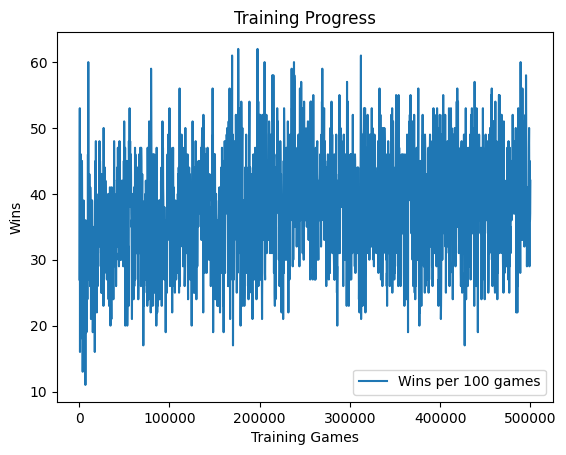

Performance against Random Agent: Wins=368, Draws=131, Losses=501
Performance against Safe Agent: Wins=2, Draws=67, Losses=931


In [16]:
class QLearningAgent:
    def __init__(self, alpha = 0.01, gamma = 0.9, epsilon = 1.0, epsilon_decay = 0.99):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.q_table = {}

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def get_possible_actions(self, state):
        board = list(state)
        return [(i//3, i%3) for i in range(9) if board[i] == ' ']

    def decay_epsilon(self):
        self.epsilon = max(0.1, self.epsilon * self.epsilon_decay)

    def update_q_value(self, state, action, reward, next_state):
        max_next_q = max([self.get_q_value(next_state, a) for a in self.get_possible_actions(state)], default = 0)
        current_q = self.get_q_value(state, action)
        new_q = current_q + self.alpha*(reward + self.gamma*max_next_q - current_q)
        self.q_table[(state, action)] = new_q

    def choose_action(self, state, possible_actions):
        # Epsilon greedy selection
        if random.random() < self.epsilon :
            return random.choice(possible_actions)

        q_values = [self.get_q_value(state, a) for a in possible_actions]
        return possible_actions[np.argmax(q_values)]


def state_to_string(board):
    return ''.join([''.join(row) for row in board])


def train_agent(agent, env, opponent, games = 10000, assess_intervals = 200):
    results = []
    for game in range(1, games + 1):
        env.reset()
        agent.epsilon = max(0.1, agent.epsilon*0.99)
        state = state_to_string(env.board)
        is_agent_turn = random.choice([True, False])
        env.cur_player = 'X' if is_agent_turn else 'O'
        winner = None

        while not winner:
            if is_agent_turn:
                
                possible_actions = agent.get_possible_actions(state)
                action = agent.choose_action(state, possible_actions)
    
                if env.is_valid_move(*action):
                    env.act(*action)
                    next_state = state_to_string(env.board)
                    winner = env.check_winner()
    
                    if winner == 'X':
                        reward = 1
                    elif winner == 'O':
                        reward = -1
                    elif winner == 'DRAW':
                        reward = 0
                    else:
                        reward = 0
    
                    agent.update_q_value(state, action, reward, next_state)
                    state = next_state
                else:
                    reward = -10
                    agent.update_q_value(state, action, reward, state)
                    winner = 'O' #opponent wins for invalid move
    
            else:
                move = opponent.select_move(env.board)
                env.act(*move)
                winner = env.check_winner()
                
            env.switch_player() 
            is_agent_turn = not is_agent_turn

        if game % assess_intervals == 0:
            wins, _ = test_agent(agent, env, opponent, games = 100)
            # env.print_board()
            results.append((game, wins))

    return results

"""
def is_winning_move(board, action, player):
    test_board = [row[:] for row in board]  # Create a copy of the board
    test_board[action[0]][action[1]] = player
    return TicTacToe().check_winner(test_board) == player

def is_blocking_move(board, action, opponent):
    return is_winning_move(board, action, opponent)

def leaves_winning_move(board, action, opponent):
    test_board = [row[:] for row in board]  # Create a copy of the board
    test_board[action[0]][action[1]] = 'X'  # Assume agent moves
    return any(is_winning_move(test_board, a, opponent) for a in agent.get_possible_actions(state_to_string(test_board)))

def train_agent(agent, env, opponent, games=10000, assess_intervals=200):
    results = []
    for game in range(1, games + 1):
        env.reset()
        agent.epsilon = max(0.1, agent.epsilon * 0.99)
        state = state_to_string(env.board)
        is_agent_turn = random.choice([True, False])
        env.cur_player = 'X' if is_agent_turn else 'O'
        winner = None

        while not winner:
            if is_agent_turn:
                possible_actions = agent.get_possible_actions(state)
                action = agent.choose_action(state, possible_actions)

                if env.is_valid_move(*action):
                    env.act(*action)
                    next_state = state_to_string(env.board)
                    winner = env.check_winner()

                    # Updated reward logic
                    if winner == 'X':  # Agent wins
                        reward = 1
                    elif winner == 'O':  # Opponent wins
                        reward = -1
                    elif winner == 'DRAW':
                        reward = 0
                    elif is_winning_move(env.board, action, 'X'):  # Potential winning move
                        reward = 0.7
                    elif is_blocking_move(env.board, action, 'O'):  # Blocking opponent's winning move
                        reward = 0.5
                    elif leaves_winning_move(env.board, action, 'O'):  # Leaves opponent a winning move
                        reward = -0.5
                    else:  # Neutral move
                        reward = 0.1

                    agent.update_q_value(state, action, reward, next_state)
                    state = next_state
                else:
                    reward = -10  # Penalize invalid moves
                    agent.update_q_value(state, action, reward, state)
                    winner = 'O'  # Opponent wins due to invalid move
            else:
                move = opponent.select_move(env.board)
                env.act(*move)
                winner = env.check_winner()

            env.switch_player()
            is_agent_turn = not is_agent_turn

        if game % assess_intervals == 0:
            wins, _ = test_agent(agent, env, opponent, games=100)
            results.append((game, wins))

    return results
"""

def test_agent(agent, env, opponent, games):
    wins, draws, losses = 0, 0, 0
    for game in range(games):
        env.reset()
        state = state_to_string(env.board)
        is_agent_turn = random.choice([True, False])
        env.cur_player = 'X' if is_agent_turn else 'O'
        winner = None

        while not winner:

            if is_agent_turn:
                possible_actions = agent.get_possible_actions(state)
                action = agent.choose_action(state, possible_actions)
                env.act(*action)
                state = state_to_string(env.board)
                winner = env.check_winner()
            else:
                move = opponent.select_move(env.board)
                env.act(*move)
                winner = env.check_winner()
            env.switch_player()
            is_agent_turn = not is_agent_turn

        if winner == 'X':
            wins += 1
        elif winner == 'O':
            losses += 1
        elif winner == 'Draw':
            draws += 1

    return wins, (draws, losses)


random_agent = RandomAgent()
safe_agent = SafeAgent()
env = TicTacToe()

agent = QLearningAgent()
training_results = train_agent(agent, env, random_agent, games=500000)
import matplotlib.pyplot as plt

# Plot training progress
epochs, wins = zip(*training_results)
plt.plot(epochs, wins, label='Wins per 100 games')
plt.xlabel('Training Games')
plt.ylabel('Wins')
plt.title('Training Progress')
plt.legend()
plt.show()

wins_random, results_random = test_agent(agent, env, random_agent, games=1000)
wins_safe, results_safe = test_agent(agent, env, safe_agent, games=1000)

print(f"Performance against Random Agent: Wins={wins_random}, Draws={results_random[0]}, Losses={results_random[1]}")
print(f"Performance against Safe Agent: Wins={wins_safe}, Draws={results_safe[0]}, Losses={results_safe[1]}")


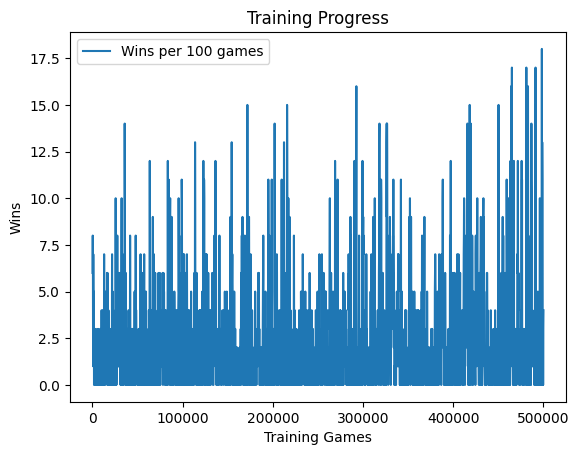

Performance against Random Agent: Wins=255, Draws=136, Losses=609
Performance against Safe Agent: Wins=47, Draws=30, Losses=923


In [17]:
training_results = train_agent(agent, env, safe_agent, games=500000)
import matplotlib.pyplot as plt

# Plot training progress
epochs, wins = zip(*training_results)
plt.plot(epochs, wins, label='Wins per 100 games')
plt.xlabel('Training Games')
plt.ylabel('Wins')
plt.title('Training Progress')
plt.legend()
plt.show()

wins_random, results_random = test_agent(agent, env, random_agent, games=1000)
wins_safe, results_safe = test_agent(agent, env, safe_agent, games=1000)

print(f"Performance against Random Agent: Wins={wins_random}, Draws={results_random[0]}, Losses={results_random[1]}")
print(f"Performance against Safe Agent: Wins={wins_safe}, Draws={results_safe[0]}, Losses={results_safe[1]}")
